<a href="https://colab.research.google.com/github/ciphenseadmin/partial-face-recognition/blob/master/plot_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, You will need to install a face detector library. 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image
import os
from google.colab.patches import cv2_imshow
import dlib


Using TensorFlow backend.


In [0]:
# load the facenet model
facenet_model = load_model('/content/drive/My Drive/facenet/keras-facenet/model/facenet_keras.h5')
print('Loaded Model')

Loaded Model


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
with np.load("/content/drive/My Drive/SubsetLfwCropped_npz_file/SubsetLfw.npz") as data:
  trainX= data["arr_0"]
  testX= data["arr_2"]
  trainy= data["arr_1"]
  testy= data["arr_3"]

In [0]:
cd "/content/drive/My Drive/SubsetLfwCropped_npz_file/"

/content/drive/My Drive/SubsetLfwCropped_npz_file


In [0]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)
# print(emdTrainX)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)
# print(emdTestX)

# save arrays to one file in compressed format
np.savez_compressed('CropedSubsetLfwEmbeddings.npz', emdTrainX, trainy, emdTestX, testy)

(3264, 128)
(1539, 128)


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer


print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)


Dataset: train=3264, test=1539


In [0]:
print(emdTrainX_norm.shape)
print(emdTrainX.shape)

(3264, 128)
(3264, 128)


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


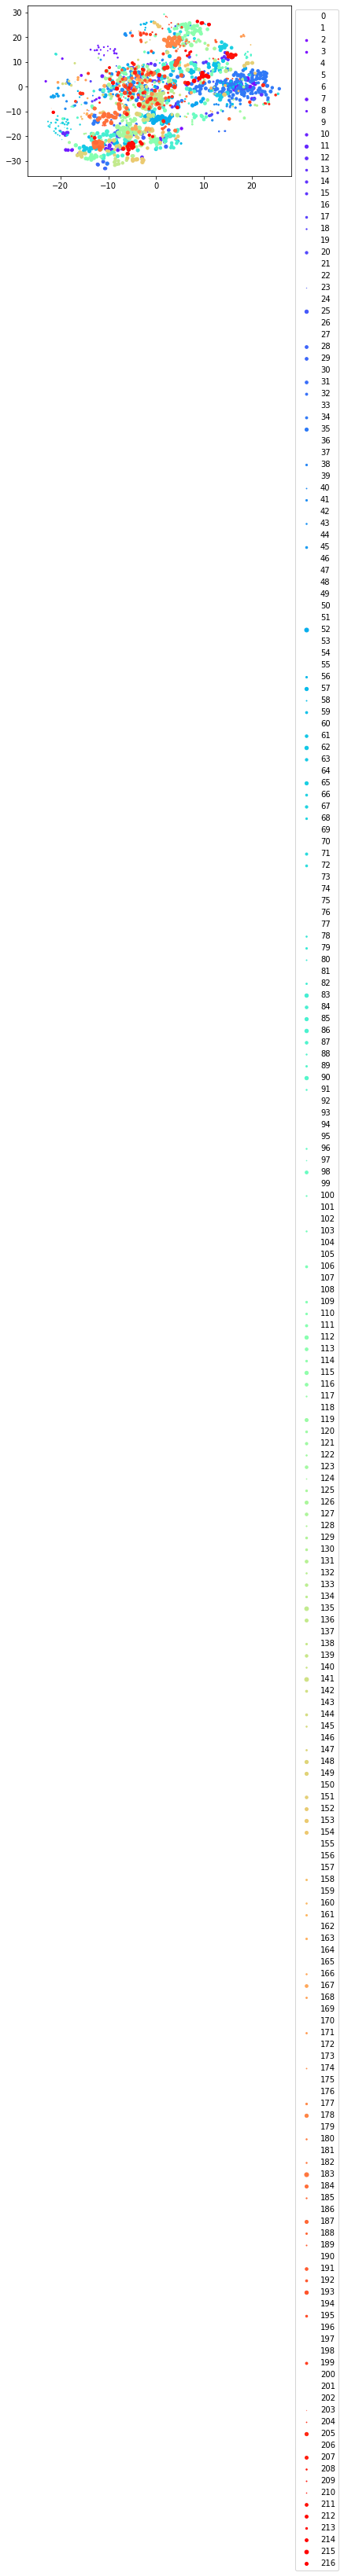

In [0]:
from sklearn.manifold import TSNE
import itertools
from matplotlib import cm


X_embedded = TSNE(n_components=3).fit_transform(emdTrainX_norm)
colors = iter(cm.rainbow(np.linspace(0, 1, 217)))

for i, t in enumerate(set(trainy_enc)):
    idx = trainy_enc == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], X_embedded[idx, 2],label=t, color= next(colors))
    # plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t, color=next(colors))   

plt.legend(bbox_to_anchor=(1, 1));

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


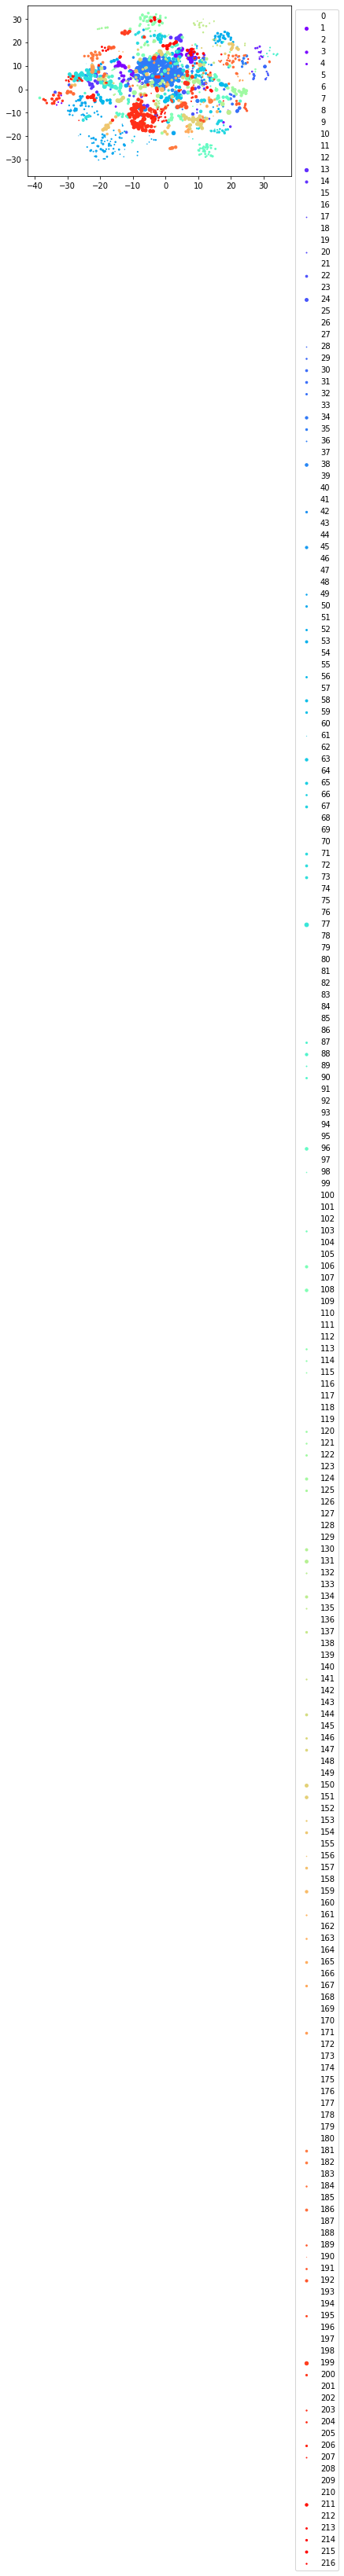

In [0]:
from sklearn.manifold import TSNE
import itertools
from matplotlib import cm


X_embedded = TSNE(n_components=3).fit_transform(emdTrainX)
colors = iter(cm.rainbow(np.linspace(0, 1, 217)))

for i, t in enumerate(set(trainy_enc)):
    idx = trainy_enc == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], X_embedded[idx, 2],label=t, color= next(colors))
    # plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t, color=next(colors))   

plt.legend(bbox_to_anchor=(1, 1));

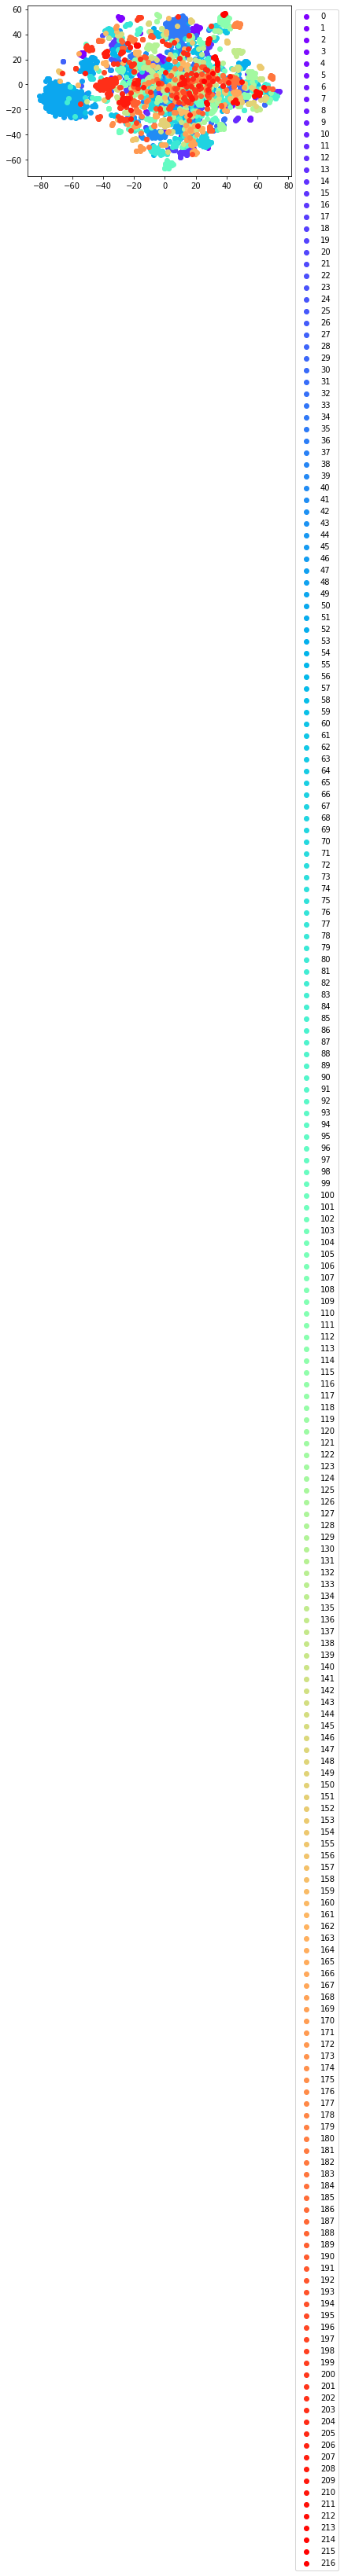

In [0]:
from sklearn.manifold import TSNE
import itertools
from matplotlib import cm


X_embedded = TSNE(n_components=2).fit_transform(emdTrainX)
colors = iter(cm.rainbow(np.linspace(0, 1, 217)))

for i, t in enumerate(set(trainy_enc)):
    idx = trainy_enc == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1],label=t, color= next(colors))
    # plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t, color=next(colors))   

plt.legend(bbox_to_anchor=(1, 1));

In [0]:
ax = fig.add_subplot(111, projection='3d')

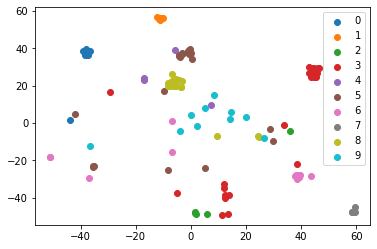

In [0]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(emdTrainX_norm)

j=0
for i, t in enumerate(set(trainy_enc)):
    if j<10:
      idx = trainy_enc == t
      plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=i)   
    else:
      break
    j+=1

plt.legend(bbox_to_anchor=(1, 1));
